In [1]:
from importlib import reload
import flymovie as fm
import cnn_models.siamese_cnn as cn
import cnn_models.evaluate_models as ev
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sklearn
import tempfile
import pickle
import tensorflow as tf
import umap
from importlib import reload
from sklearn.manifold import TSNE
import scipy.ndimage as ndi
import skimage as ski
%load_ext autoreload
%autoreload 2

In [42]:
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zldcterm-sims-202200429_iMcznuTE_mix_real_sim_3_34layer.pkl') 
em_r, files_r = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings_zldcterm-real_mix_real_sim_2_34layer_parallel.pkl') 

In [30]:
def find_in_radius(em1, files1, em2, files2, r):
    def dists_arr_to_row(arr, row):
        dists_sq = np.sum((arr - row) ** 2, axis=1)
        dists = np.sqrt(dists_sq)
        return dists

    for i in range(len(files1)):
        if i % 250 == 0:
            print(i)

        dists = dists_arr_to_row(em2, em1[i])
        good_uns = dists <= r
        #good_files1 = np.array(files1)[good_uns]
        good_files2 = np.array(files2)[good_uns]

    return good_files2

find_in_radius(em_r, files_r, em_s, files_s, r=3)

0
250


array(['ATN_7502.71_1.0_1_1_1_0.01_1_0.01_13.26_rep1.pkl',
       'AUX_8810.2_1.0_1_1_1_0.01_1_0.01_13.52_rep1.pkl',
       'AWN_6278.23_1.0_1_1_1_0.01_1_0.01_8.99_rep1.pkl',
       'AWN_7285.28_1.0_1_1_1_0.01_1_0.01_8.99_rep0.pkl',
       'AXS_6654.27_1.0_1_1_1_0.01_1_0.01_11.21_rep0.pkl',
       'AXS_7745.79_1.0_1_1_1_0.01_1_0.01_11.21_rep1.pkl',
       'AZj_7384.45_1.0_1_1_1_0.01_1_0.01_12.22_rep0.pkl',
       'Alw_7745.79_1.0_1_1_1_0.01_1_0.01_16.59_rep1.pkl',
       'AnP_6561.48_1.0_1_1_1_0.01_1_0.01_8.56_rep1.pkl',
       'AnP_7558.8_1.0_1_1_1_0.01_1_0.01_8.56_rep0.pkl',
       'Ana_6769.47_1.0_1_1_1_0.01_1_0.01_11.88_rep1.pkl',
       'Asf_7847.12_1.0_1_1_1_0.01_1_0.01_10.71_rep1.pkl',
       'Asf_8116.62_1.0_1_1_1_0.01_1_0.01_10.71_rep0.pkl',
       'Awy_4866.94_1.0_1_1_1_0.01_1_0.01_8.67_rep0.pkl',
       'Awy_6197.78_1.0_1_1_1_0.01_1_0.01_8.67_rep1.pkl',
       'BGN_6112.6_1.0_1_1_1_0.01_1_0.01_11.11_rep0.pkl',
       'BGN_7978.36_1.0_1_1_1_0.01_1_0.01_11.11_rep1.pkl',
      

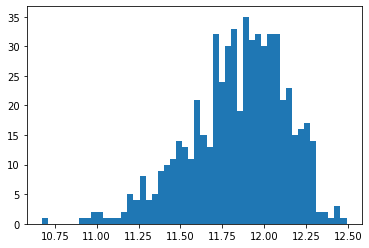

In [45]:
def dists_arr_to_row(arr, row):
        dists_sq = np.sum((arr - row) ** 2, axis=1)
        dists = np.sqrt(dists_sq)
        return dists

d = dists_arr_to_row(em_s, em_r[4])
plt.hist(d, bins=50);

In [33]:
im = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/simulations/zldcterm-sims-202200420_mxrxIKwG/all/aWp_7596.88_1.0_1_1_1_0.01_1_0.01_3.65_rep0.pkl')
fm.viewer(im, 5)

interactive(children=(Dropdown(description='Color', index=3, options=('gray', 'Reds', 'gray_r', 'cividis', 'vi…

In [38]:
mask = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_masks/zld-cterm/20220321-zld-cterm-em1-01_2.pkl')
sim = Sim(mask)
sim.conc_to_nmolecules(160)

9619.905420752002

In [48]:
im = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/zld-cterm/zld-cterm_20220321-zld-cterm-gfp-em1-01_0_3.pkl')
fm.viewer(im, 5)

interactive(children=(Dropdown(description='Color', index=3, options=('gray', 'Reds', 'gray_r', 'cividis', 'vi…

In [51]:
s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/simulations/zld-cterm-sims-20220406_ofzoALMZ/OGc_20688_14.55_0_0_1_0.1_16_0.59_6.58_rep0.pkl')
fm.viewer(s, 5)

interactive(children=(Dropdown(description='Color', index=3, options=('gray', 'Reds', 'gray_r', 'cividis', 'vi…